# 1. Vehicle Loads and Design
## a)
> Discuss how the power train controls for the Honda and Toyota engines allow for a single curve of engine brake thermal efficiency *η<sub>eng</sub>* as a function of engine torque *T<sub>eng</sub>* at 2 different engine speeds

The Honda engine, representing the HPD pathway, shows that its brake thermal efficiency changes very little as a function of speed within the observed speed range, demonstrating its ability to maintain high efficiency across varying engine speeds. The Toyota engine, on the other hand, represents the LPD pathway utilizing an Atkinson cycle and EGR dilution, which also displays efficiency advantages at different engine speeds. The efficiency curve's consistency across different speeds and loads for these engines can be attributed to advanced powertrain controls, such as turbocharging (in the case of the Honda engine) and the use of the Atkinson cycle combined with EGR (in the case of the Toyota engine). These technologies optimize combustion efficiency and minimize losses, allowing for the engines to operate more efficiently over a wider range of conditions.


> Make separate fits for *η<sub>eng</sub>* for the Honda and Toyota engines as a function of Teng. The fits will involve three parameters, *η<sub>eng,0</sub>*, *T<sub>1</sub>* and *T<sub>2</sub>* of the formula in the following form.

- [Honda data found here](https://catalog.data.gov/dataset/supporting-data-for-stuhldreher-m-kargul-j-barba-d-mcdonald-j-et-al-2018-benchmarking-a-20)
- [Toyota data found here](https://www.epa.gov/vehicle-and-fuel-emissions-testing/benchmarking-advanced-low-emission-light-duty-vehicle-technology#test-data)

,make,Speed,Torque (Nm),BTE
0,Toyota,1153,2.20,2.70
1,Toyota,1153,11.50,13.00
2,Toyota,1153,18.60,17.80
3,Toyota,1153,22.60,20.51
4,Toyota,1153,40.50,28.28
...,...,...,...,...
58,Honda,1251,121.22,33.75
59,Honda,1251,129.21,33.35
60,Honda,1251,134.98,33.16
61,Honda,1251,137.13,33.16


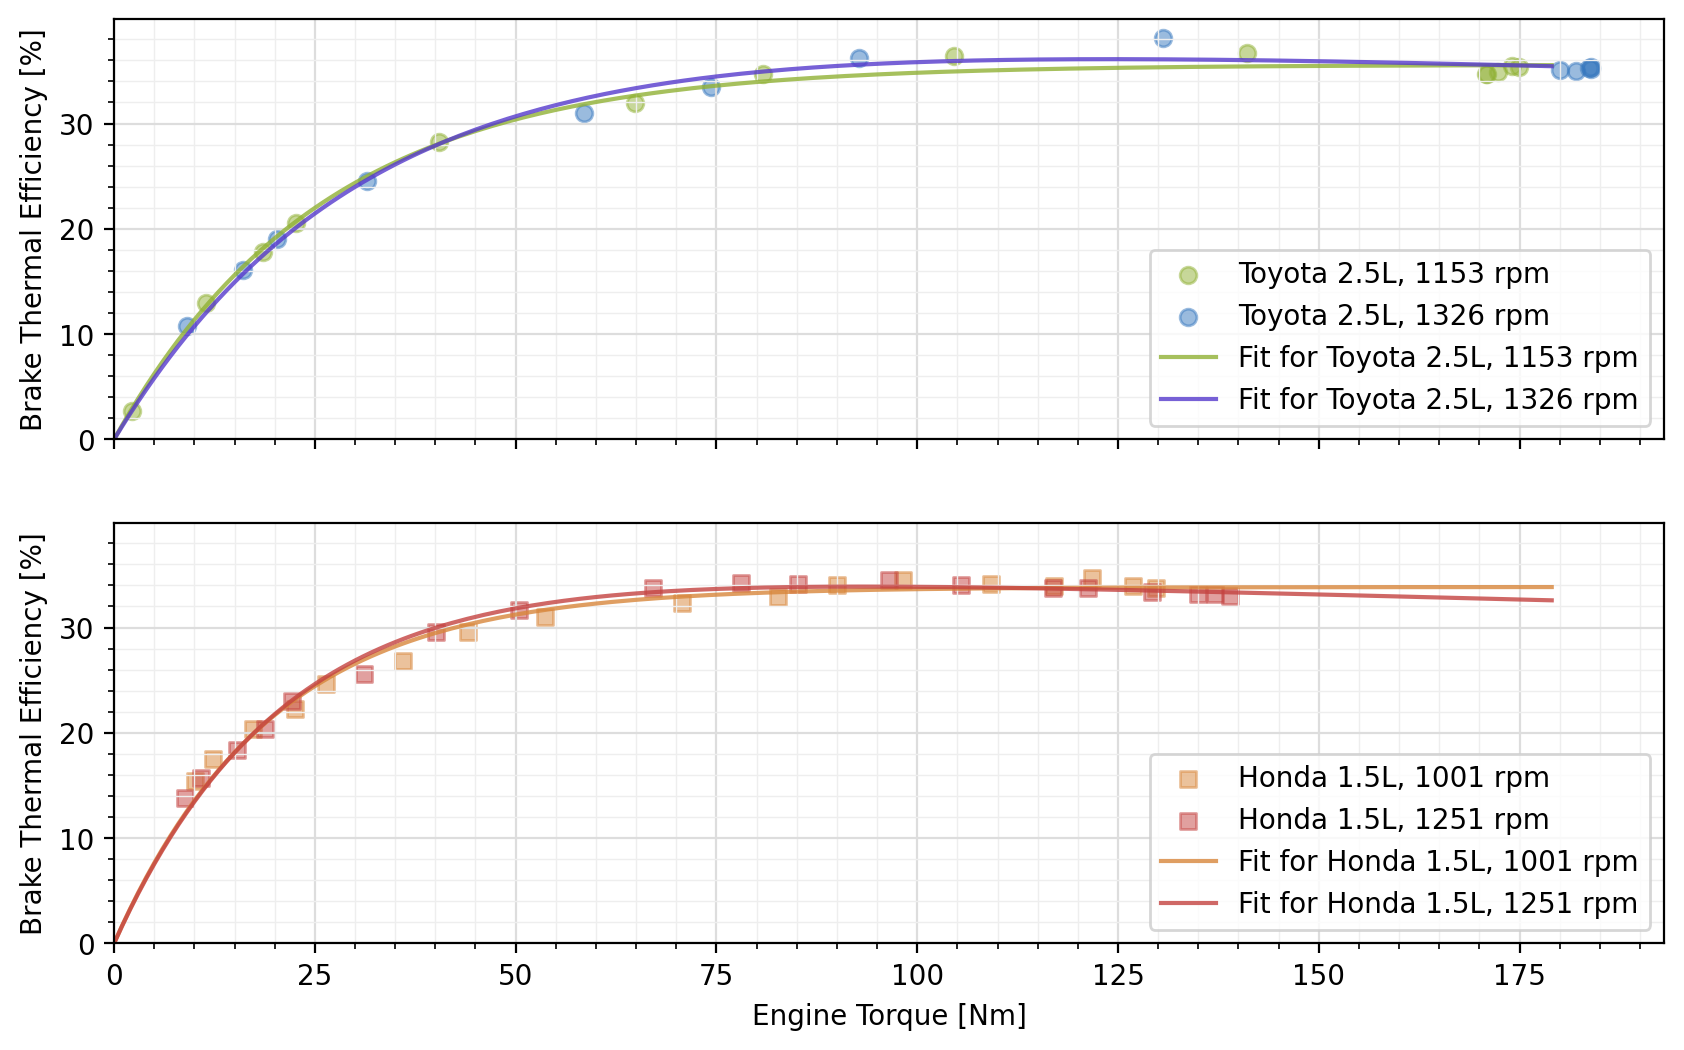

In [261]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw_utils import palette, nice_grid
import scipy.optimize as opt


engine_data = pd.read_csv("./engine_test_data.csv")


toyota_1153 = engine_data.loc[
    (engine_data["make"] == "Toyota") & (engine_data["Speed"] == 1153)
]
toyota_1326 = engine_data.loc[
    (engine_data["make"] == "Toyota") & (engine_data["Speed"] == 1326)
]
honda_1001 = engine_data.loc[
    (engine_data["make"] == "Honda") & (engine_data["Speed"] == 1001)
]
honda_1251 = engine_data.loc[
    (engine_data["make"] == "Honda") & (engine_data["Speed"] == 1251)
]

fig, axs = plt.subplots(2, figsize=(10, 6), sharex=True, sharey=True)

axs[0].scatter(
    toyota_1153["Torque (Nm)"],
    toyota_1153["BTE"],
    color="xkcd:avocado",
    marker="o",
    label="Toyota 2.5L, 1153 rpm",
    alpha=0.5,
)
axs[0].scatter(
    toyota_1326["Torque (Nm)"],
    toyota_1326["BTE"],
    color=palette("blue"),
    marker="o",
    label="Toyota 2.5L, 1326 rpm",
    alpha=0.5,
)

axs[1].scatter(
    honda_1001["Torque (Nm)"],
    honda_1001["BTE"],
    color="xkcd:dull orange",
    marker="s",
    label="Honda 1.5L, 1001 rpm",
    alpha=0.5,
)
axs[1].scatter(
    honda_1251["Torque (Nm)"],
    honda_1251["BTE"],
    color="xkcd:reddish",
    marker="s",
    label="Honda 1.5L, 1251 rpm",
    alpha=0.5,
)
nice_grid(axs[0])
nice_grid(axs[1])
axs[0].set_xlim(0)
axs[0].set_ylim(0)
axs[1].set_xlim(0)
axs[1].set_ylim(0)


def efficiency_function(T_eng, eta_0, T_1, T_2):
    return eta_0 * (np.exp(-T_eng / T_1) - np.exp(-T_eng / T_2))


# curve fitting
popt_t1153, pcov = opt.curve_fit(
    efficiency_function,
    toyota_1153["Torque (Nm)"],
    toyota_1153["BTE"],
    [1e6, 1, 2020],
)
axs[0].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_t1153),
    color="xkcd:avocado",
    label="Fit for Toyota 2.5L, 1153 rpm",
    alpha=0.8,
)

popt_t1326, pcov = opt.curve_fit(
    efficiency_function,
    toyota_1326["Torque (Nm)"],
    toyota_1326["BTE"],
    [1e6, 1, 2020],
)
axs[0].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_t1326),
    color="xkcd:blurple",
    label="Fit for Toyota 2.5L, 1326 rpm",
    alpha=0.8,
)

popt_h1001, pcov = opt.curve_fit(
    efficiency_function,
    honda_1001["Torque (Nm)"],
    honda_1001["BTE"],
    [1e6, 1, 2020],
)
axs[1].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_h1001),
    color="xkcd:dull orange",
    label="Fit for Honda 1.5L, 1001 rpm",
    alpha=0.8,
)

popt_h1251, pcov = opt.curve_fit(
    efficiency_function,
    honda_1251["Torque (Nm)"],
    honda_1251["BTE"],
    [1e6, 1, 2020],
)
axs[1].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_h1251),
    color="xkcd:reddish",
    label="Fit for Honda 1.5L, 1251 rpm",
    alpha=0.8,
)

axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("Engine Torque [Nm]")
axs[0].set_ylabel("Brake Thermal Efficiency [%]")
axs[1].set_ylabel("Brake Thermal Efficiency [%]")


engine_data

## b)

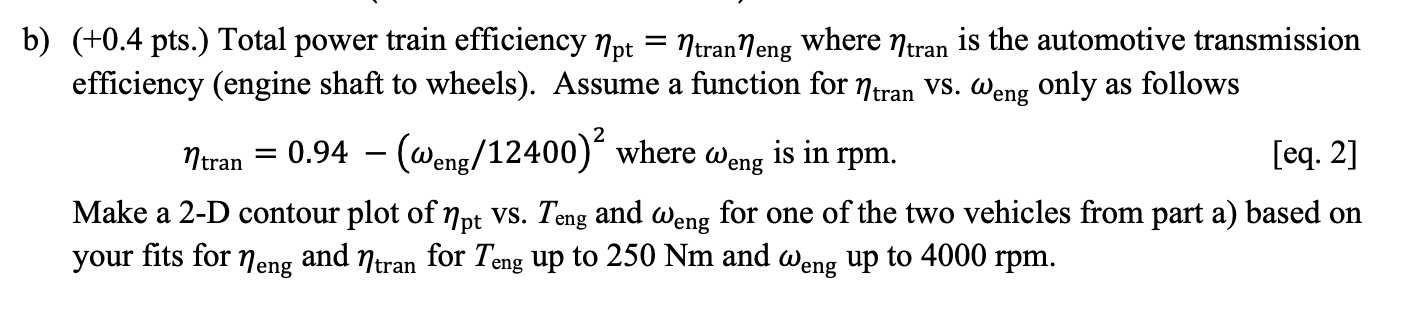


array([<Axes: >, <Axes: >], dtype=object)

Text(0.5, 1.0, 'Honda 1.5L, η_eng based on 1252 rpm fit')

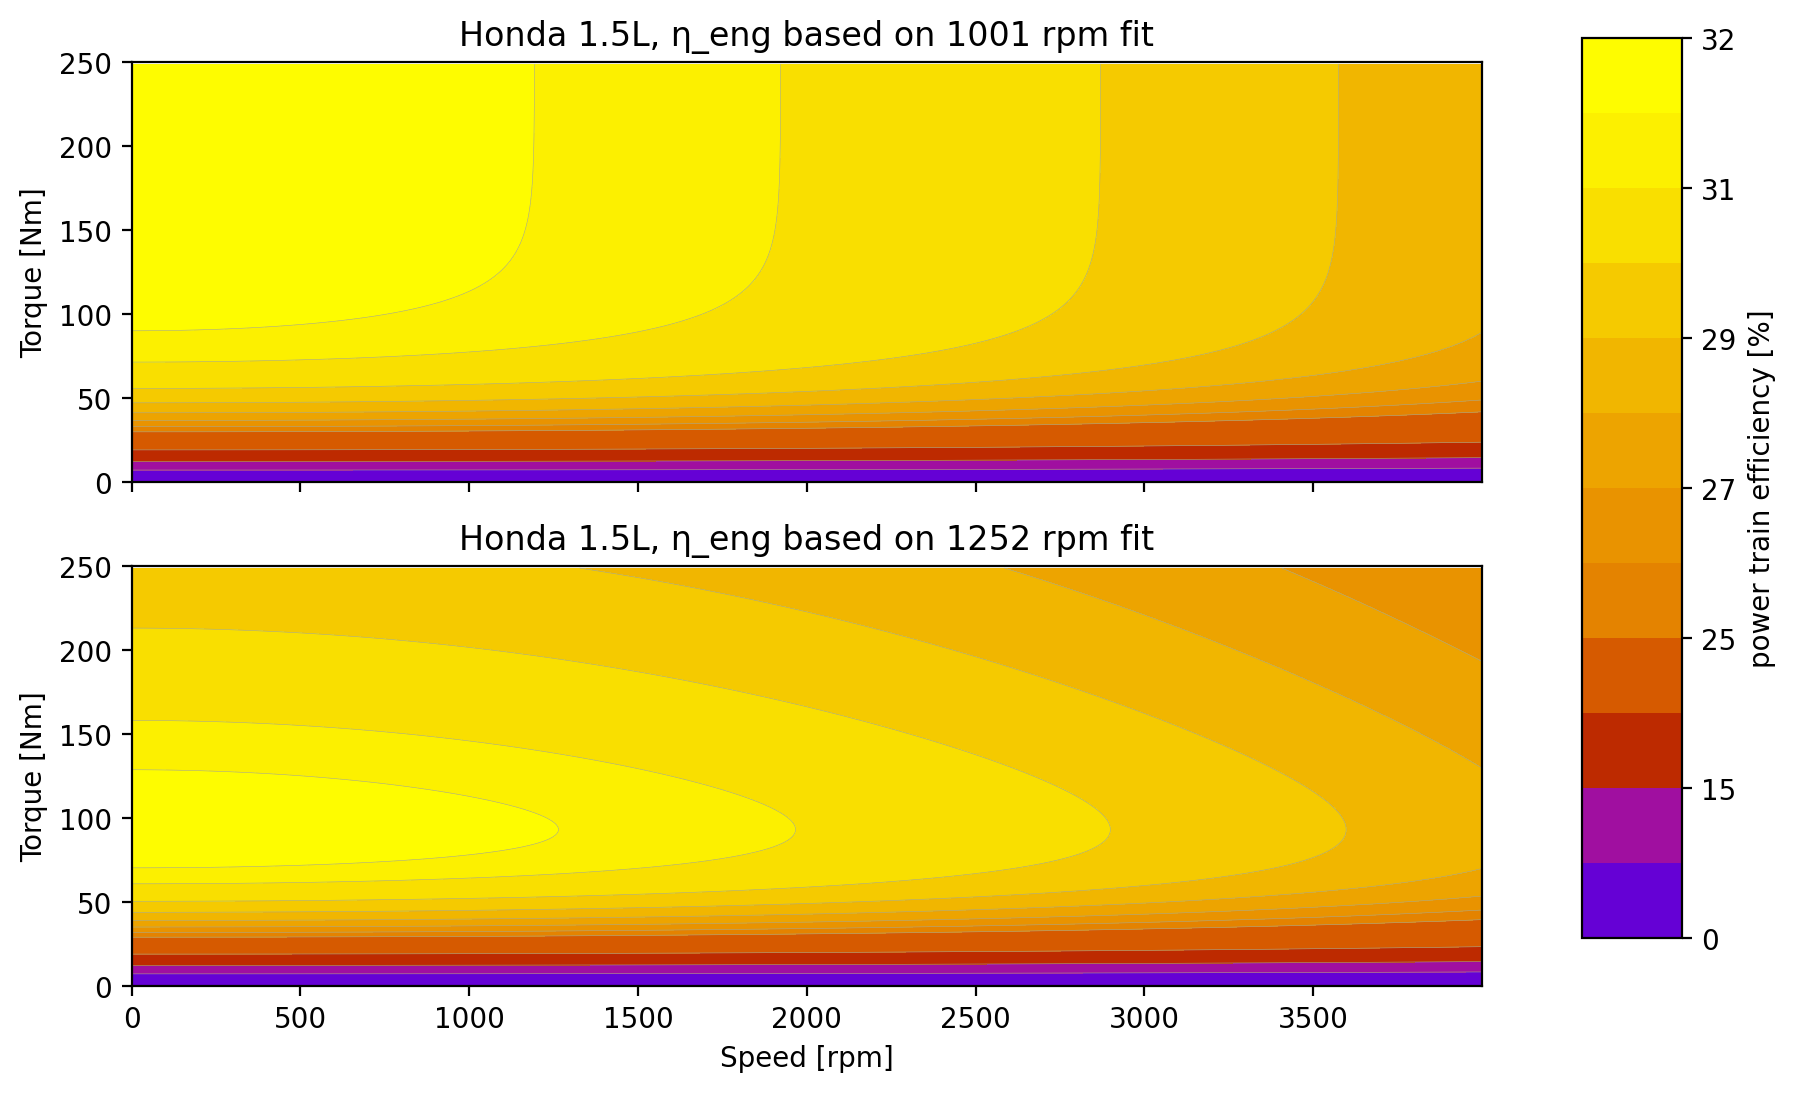

In [262]:
def transmission_efficiency(w_eng):
    return 0.94 - (w_eng / 12400) ** 2


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10, 6))

display(axs)
rpm, torque = np.meshgrid(np.arange(4000), np.arange(250))
levels = [
    0,
    10,
    15,
    20,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    31.5,
    32,
]
eff = transmission_efficiency(rpm) * efficiency_function(torque, *popt_h1001)
contourplot = axs[0].contourf(rpm, torque, eff, levels, cmap="gnuplot")
axs[0].contour(rpm, torque, eff, levels, colors=palette("grey"), linewidths=0.2)
eff = transmission_efficiency(rpm) * efficiency_function(torque, *popt_h1251)
contourplot2 = axs[1].contourf(rpm, torque, eff, levels, cmap="gnuplot")
axs[1].contour(rpm, torque, eff, levels, colors=palette("grey"), linewidths=0.2)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.75])
fig.colorbar(contourplot2, cax=cbar_ax, label="power train efficiency [%]")


axs[0].set_ylim(0, 250)
axs[1].set_xlabel("Speed [rpm]")
axs[0].set_ylabel("Torque [Nm]")
axs[1].set_ylabel("Torque [Nm]")
axs[0].set_title("Honda 1.5L, η_eng based on 1001 rpm fit")
axs[1].set_title("Honda 1.5L, η_eng based on 1252 rpm fit")

# 2. Battery Technology
a)
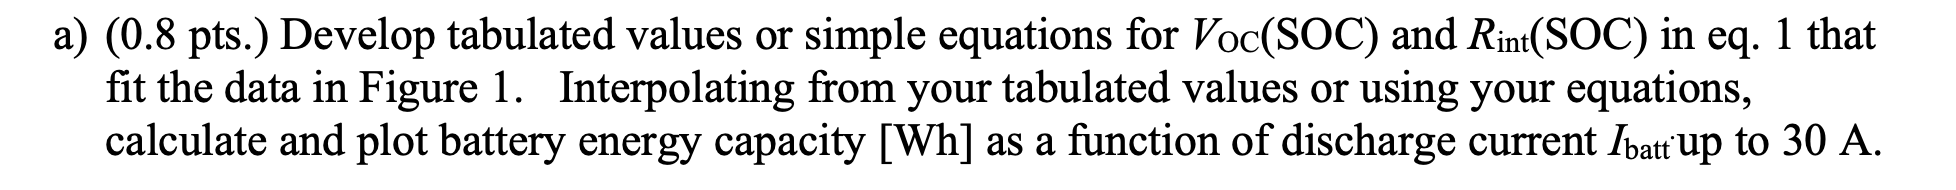

Extracted data from the plot using [this tool](https://apps.automeris.io/wpd/).

Below you'll see what my extracted data looks like.

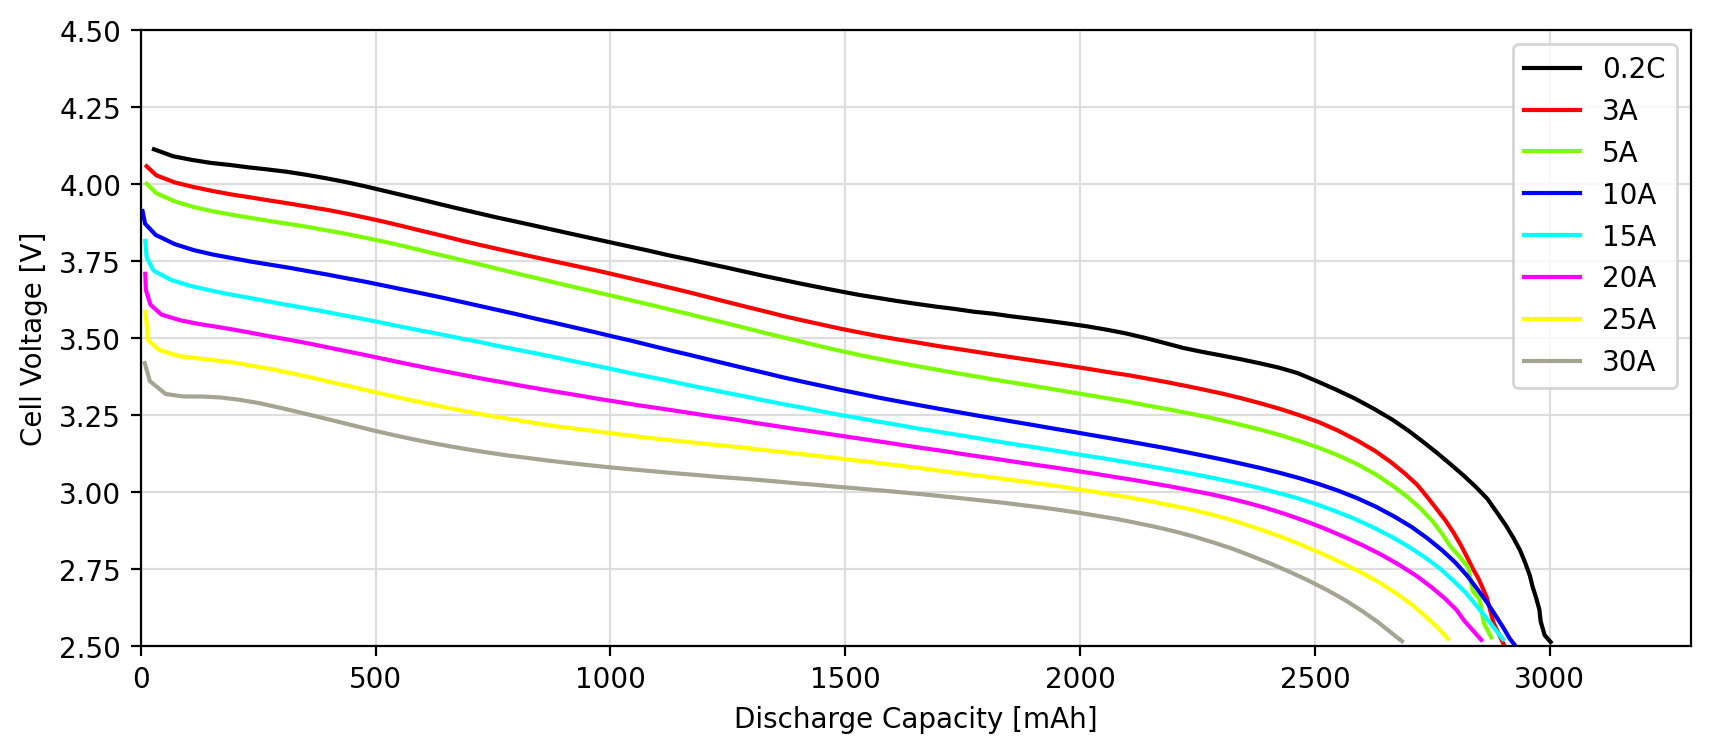

In [263]:
df_voltage = pd.read_csv("./voltage_soc_data.csv")

fig, ax = plt.subplots(figsize=(10, 4))

current_02 = df_voltage[df_voltage["Discharge Current (A)"] == 0.2]
current_3 = df_voltage[df_voltage["Discharge Current (A)"] == 3]
current_5 = df_voltage[df_voltage["Discharge Current (A)"] == 5]
current_10 = df_voltage[df_voltage["Discharge Current (A)"] == 10]
current_15 = df_voltage[df_voltage["Discharge Current (A)"] == 15]
current_20 = df_voltage[df_voltage["Discharge Current (A)"] == 20]
current_25 = df_voltage[df_voltage["Discharge Current (A)"] == 25]
current_30 = df_voltage[df_voltage["Discharge Current (A)"] == 30]

currents = [
    (current_02, 0.2),
    (current_3, 3),
    (current_5, 5),
    (current_10, 10),
    (current_15, 15),
    (current_20, 20),
    (current_25, 25),
    (current_30, 30),
]

colors = [
    "black",
    "red",
    "lawngreen",
    "blue",
    "aqua",
    "magenta",
    "yellow",
    palette("grey"),
]

for ind, (df, i) in enumerate(currents):
    ax.plot(
        df["Discharge Capacity (mAh)"],
        df["Cell Voltage (V)"],
        label=f"{i}A" if i != 0.2 else "0.2C",
        color=colors[ind],
    )

ax.legend()
ax.set_xlim(0, 3300)
ax.set_ylim(2.5, 4.5)
ax.set_xlabel("Discharge Capacity [mAh]")
ax.set_ylabel("Cell Voltage [V]")

nice_grid(ax)
ax.minorticks_off()

Okay, now let's model cell performance with this equation 

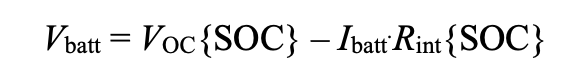 

and make sure things still look generally correct.

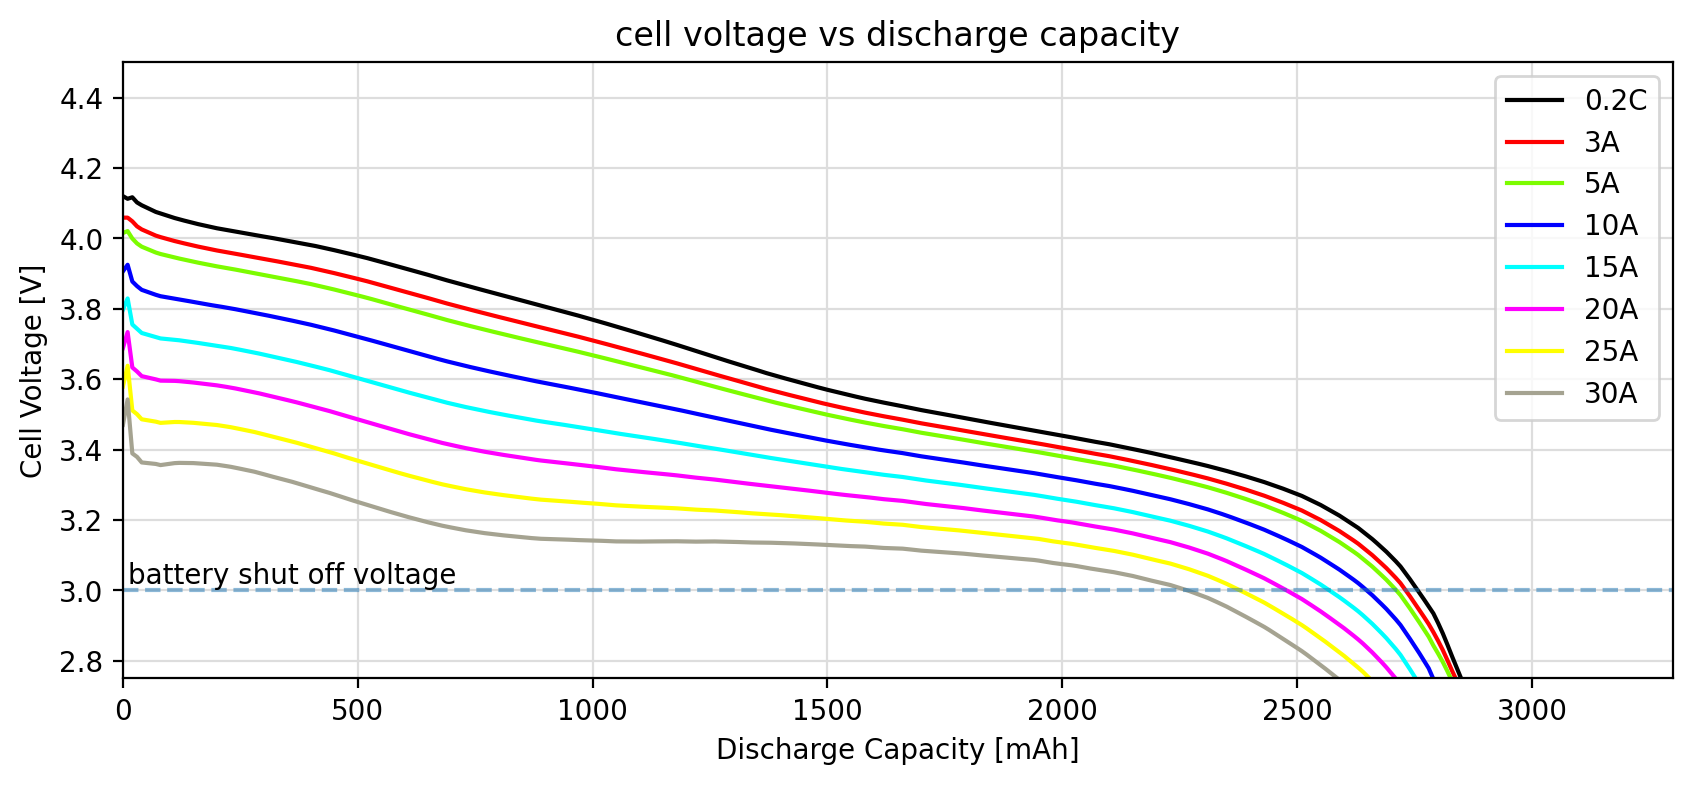

In [265]:
x_dis_cap = np.arange(0, 3000, 10)


# calculating R_int based on 10 A and 25 A current
def calc_rint():
    curs = [(current_10, 10), (current_25, 25)]
    r_arr = []
    for ind in range(len(curs)):
        if ind == 0:
            continue
        df_upper, i_upper = curs[ind]
        df_lower, i_lower = curs[ind - 1]

        r = (
            np.interp(
                x_dis_cap,
                df_upper["Discharge Capacity (mAh)"],
                df_upper["Cell Voltage (V)"],
                right=2.5,
            )
            - np.interp(
                x_dis_cap,
                df_lower["Discharge Capacity (mAh)"],
                df_lower["Cell Voltage (V)"],
                right=2.5,
            )
        ) / (-1 * (i_upper - i_lower))

        r_arr = [*r_arr, r]
    return np.mean(r_arr, axis=0)


rint = calc_rint()

# calculate v_oc based on 3 amp cell voltage curve and calculted R_int
v_oc = (
    np.interp(
        x_dis_cap,
        current_3["Discharge Capacity (mAh)"],
        current_3["Cell Voltage (V)"],
    )
    + rint * 3
)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_ylim(2.75, 4.5)
ax.set_xlim(0, 3300)
for ind, (_df, i) in enumerate(currents):
    ax.plot(
        x_dis_cap,
        v_oc - i * rint,
        color=colors[ind],
        label=f"{i}A" if i != 0.2 else "0.2C",
    )

ax.hlines([3], 0, 4000, linestyles="dashed", alpha=0.5)
ax.text(10, 3.02, "battery shut off voltage")
nice_grid(ax)
ax.minorticks_off()
ax.set_xlabel("Discharge Capacity [mAh]")
ax.set_ylabel("Cell Voltage [V]")
ax.legend()
ax.set_title("cell voltage vs discharge capacity");

### Great! This still looks very similar to our original plot.

To get the battery energy capacity for a given current, we'll integrate these curves from 0 until the discharge capacity where cell voltage falls to 3 V. (We also need to divide by 1000 to change mAh to Ah.)

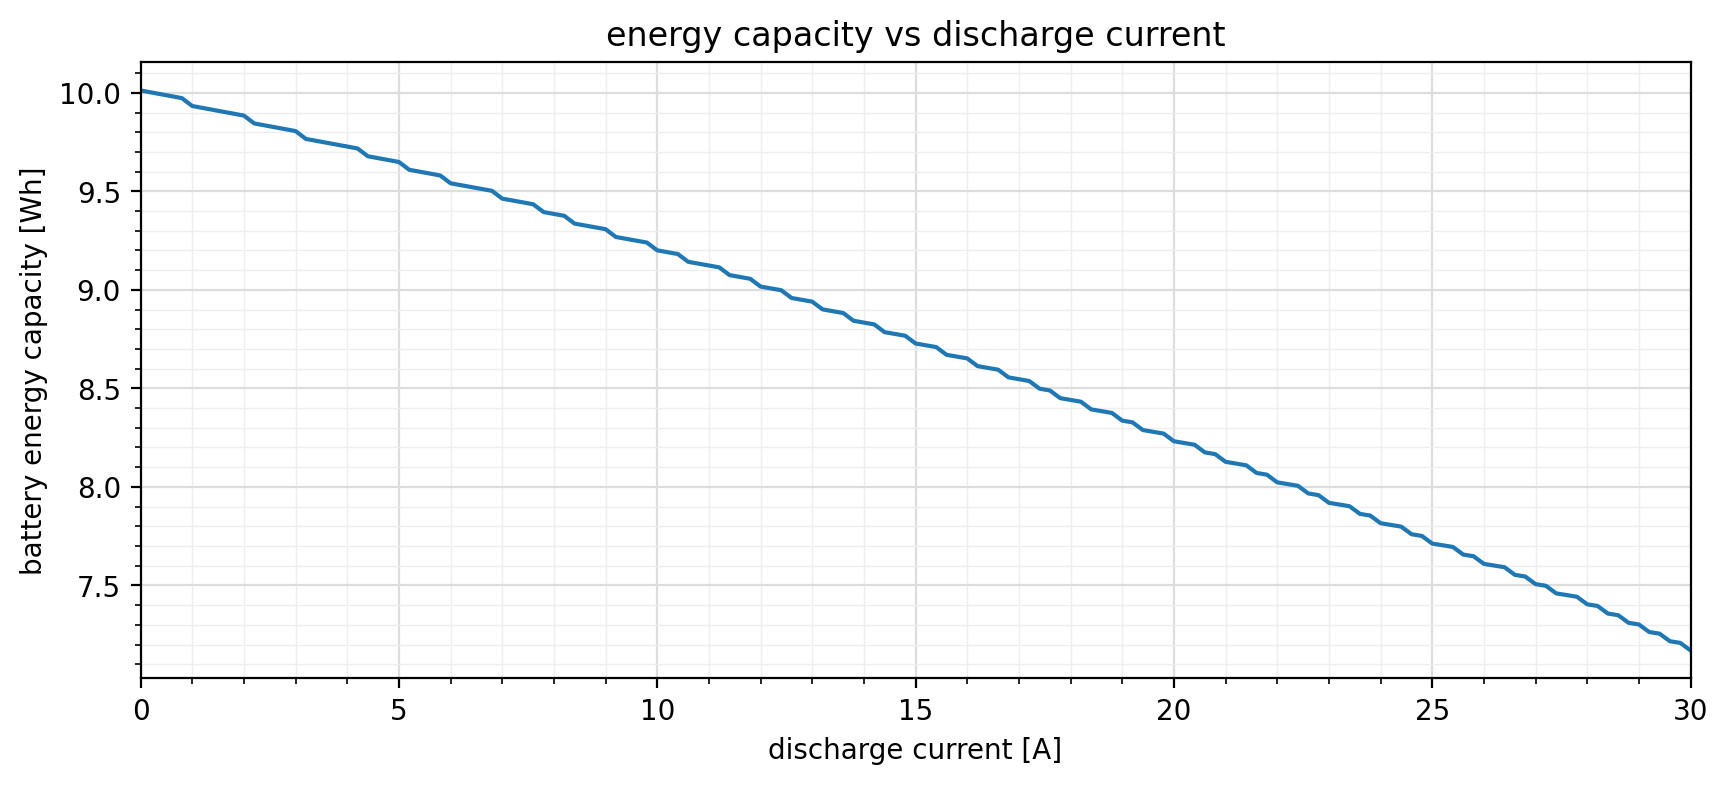

In [276]:
i_batt = np.arange(0, 30.2, 0.2)

threshold = 3
energy_capacity = []
energy_capacity_in_amp_hours = []


for i in i_batt:
    voltages = v_oc - i * rint
    first_index_where_voltage_below_threshold = next(
        (index for index, value in enumerate(voltages) if value < threshold), None
    )
    integral = np.trapz(
        voltages[:first_index_where_voltage_below_threshold],
        x_dis_cap[:first_index_where_voltage_below_threshold] / 1000,
    )
    energy_capacity = [*energy_capacity, integral]

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(0, 30)
ax.plot(i_batt, energy_capacity)
ax.set_ylabel("battery energy capacity [Wh]")
ax.set_xlabel("discharge current [A]")
ax.set_title("energy capacity vs discharge current")
nice_grid(ax)

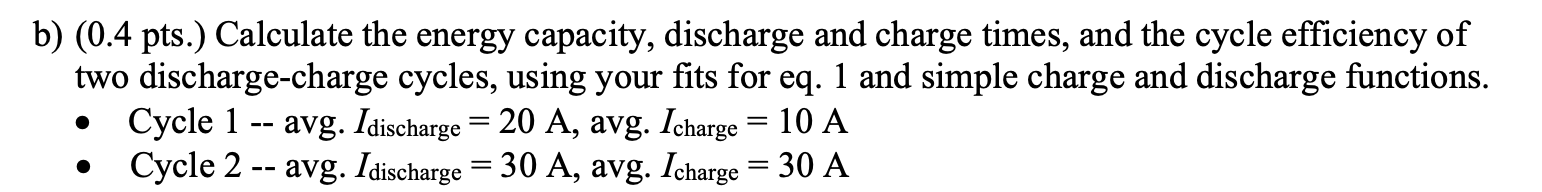

In [291]:
# code for getting energy capacities and discharge times
i_batt = [20, 30, -10, -30]

for i in i_batt:
    voltages = v_oc - i * rint
    first_index_where_voltage_below_threshold = next(
        (index for index, value in enumerate(voltages) if value < threshold), None
    )
    integral = np.trapz(
        voltages[:first_index_where_voltage_below_threshold],
        x_dis_cap[:first_index_where_voltage_below_threshold] / 1000,
    )
    energy_capacity = [*energy_capacity, integral]
    print(
        f"current [A]: {i}, ",
        f"energy capacity [Wh]: {round(integral, 2)},",
        f"discharge_capacity [mAh]: {(x_dis_cap[first_index_where_voltage_below_threshold] + x_dis_cap[first_index_where_voltage_below_threshold - 1]) / 2}",
    )

current [A]: 20,  energy capacity [Wh]: 8.23, discharge_capacity [mAh]: 2475.0
current [A]: 30,  energy capacity [Wh]: 7.17, discharge_capacity [mAh]: 2265.0
current [A]: -10,  energy capacity [Wh]: 10.72, discharge_capacity [mAh]: 2825.0
current [A]: -30,  energy capacity [Wh]: 11.85, discharge_capacity [mAh]: 2865.0


We can get energy capacity by reading off our **energy capacity vs discharge current** plot at the given discharge current. 
- Cycle 1: at discharge current = 20 A, battery capacity = <mark>8.2 Wh</mark>
- Cycle 2: at discharge current = 30 A, battery capacity = <mark>7.2 Wh</mark>

To get discharge times, we can basically read off the **cell voltage vs discharge capacity** plot.
- Cycle 1
    - the 20A curve crosses the 3 volt cutoff voltage at 2475 mAh
    - divide by 20A (20000 mA) to get 0.11 hours (<mark>6.6 minutes</mark>)

- Cycle 2
    - the 30A curve crosses the 3 volt cutoff voltage at 2265 mAh
    - divide by 30A (30000 mA) to get 0.076 hours (<mark>4.6 minutes</mark>)

To get charge times, we don't have the desired curves on our **cell voltage vs discharge capacity** plot, but we can add them!

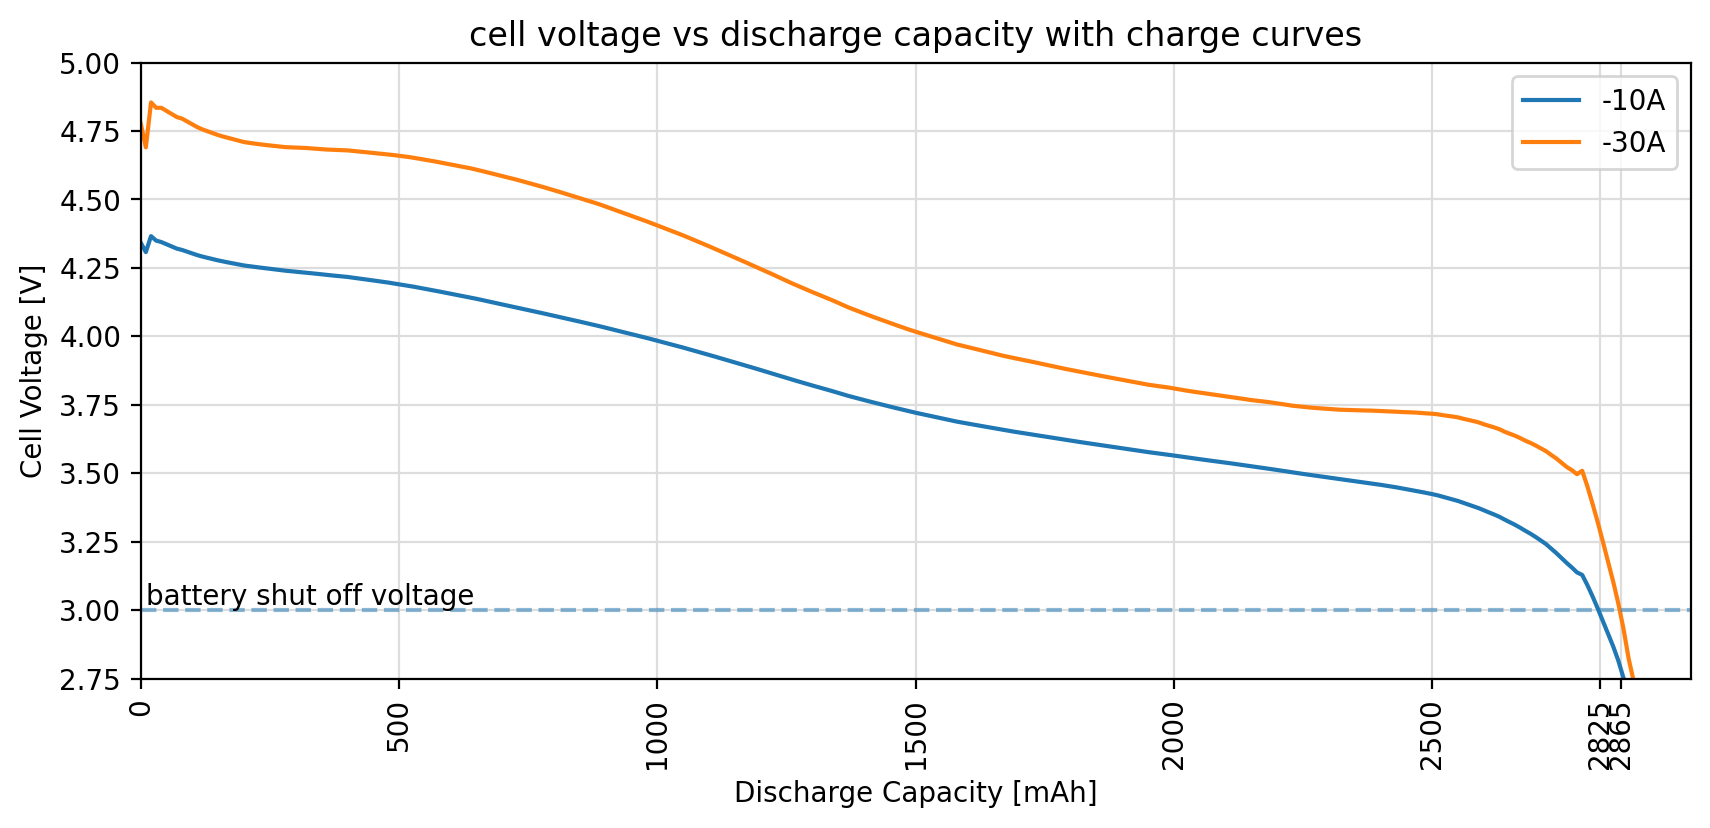

In [290]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_ylim(2.75, 5)
ax.set_xlim(0, 3000)

currents = [-10, -30]
x_max = []
for ind, i in enumerate(currents):
    charge_curve = v_oc - i * rint
    ax.plot(
        x_dis_cap,
        charge_curve,
        label=f"{i}A",
    )
    first_index_where_voltage_below_threshold = next(
        (index for index, value in enumerate(charge_curve) if value < threshold), None
    )
    x_max = [
        *x_max,
        (
            x_dis_cap[first_index_where_voltage_below_threshold]
            + x_dis_cap[first_index_where_voltage_below_threshold - 1]
        )
        / 2,
    ]
ax.set_xticks([*x_max, 0, 500, 1000, 1500, 2000, 2500])
ax.tick_params(axis="x", labelrotation=90)

ax.hlines([3], 0, 4000, linestyles="dashed", alpha=0.5)
ax.text(10, 3.02, "battery shut off voltage")
nice_grid(ax)
ax.minorticks_off()
ax.set_xlabel("Discharge Capacity [mAh]")
ax.set_ylabel("Cell Voltage [V]")
ax.legend()
ax.set_title("cell voltage vs discharge capacity with charge curves");

We can now extract the charge times.
- Cycle 1
    - 2825 mAh / 10,000 mA = 0.2825 hours = <mark>17.0 minutes</mark>
- Cycle 2
    - 2865 mAh / 30,000 mA = 0.0955 hours = <mark>5.7 minutes</mark>

Now let's compute the cycle efficiencies. Graphically, in the plot below, the efficiency will be the area in red divided by the area in green.

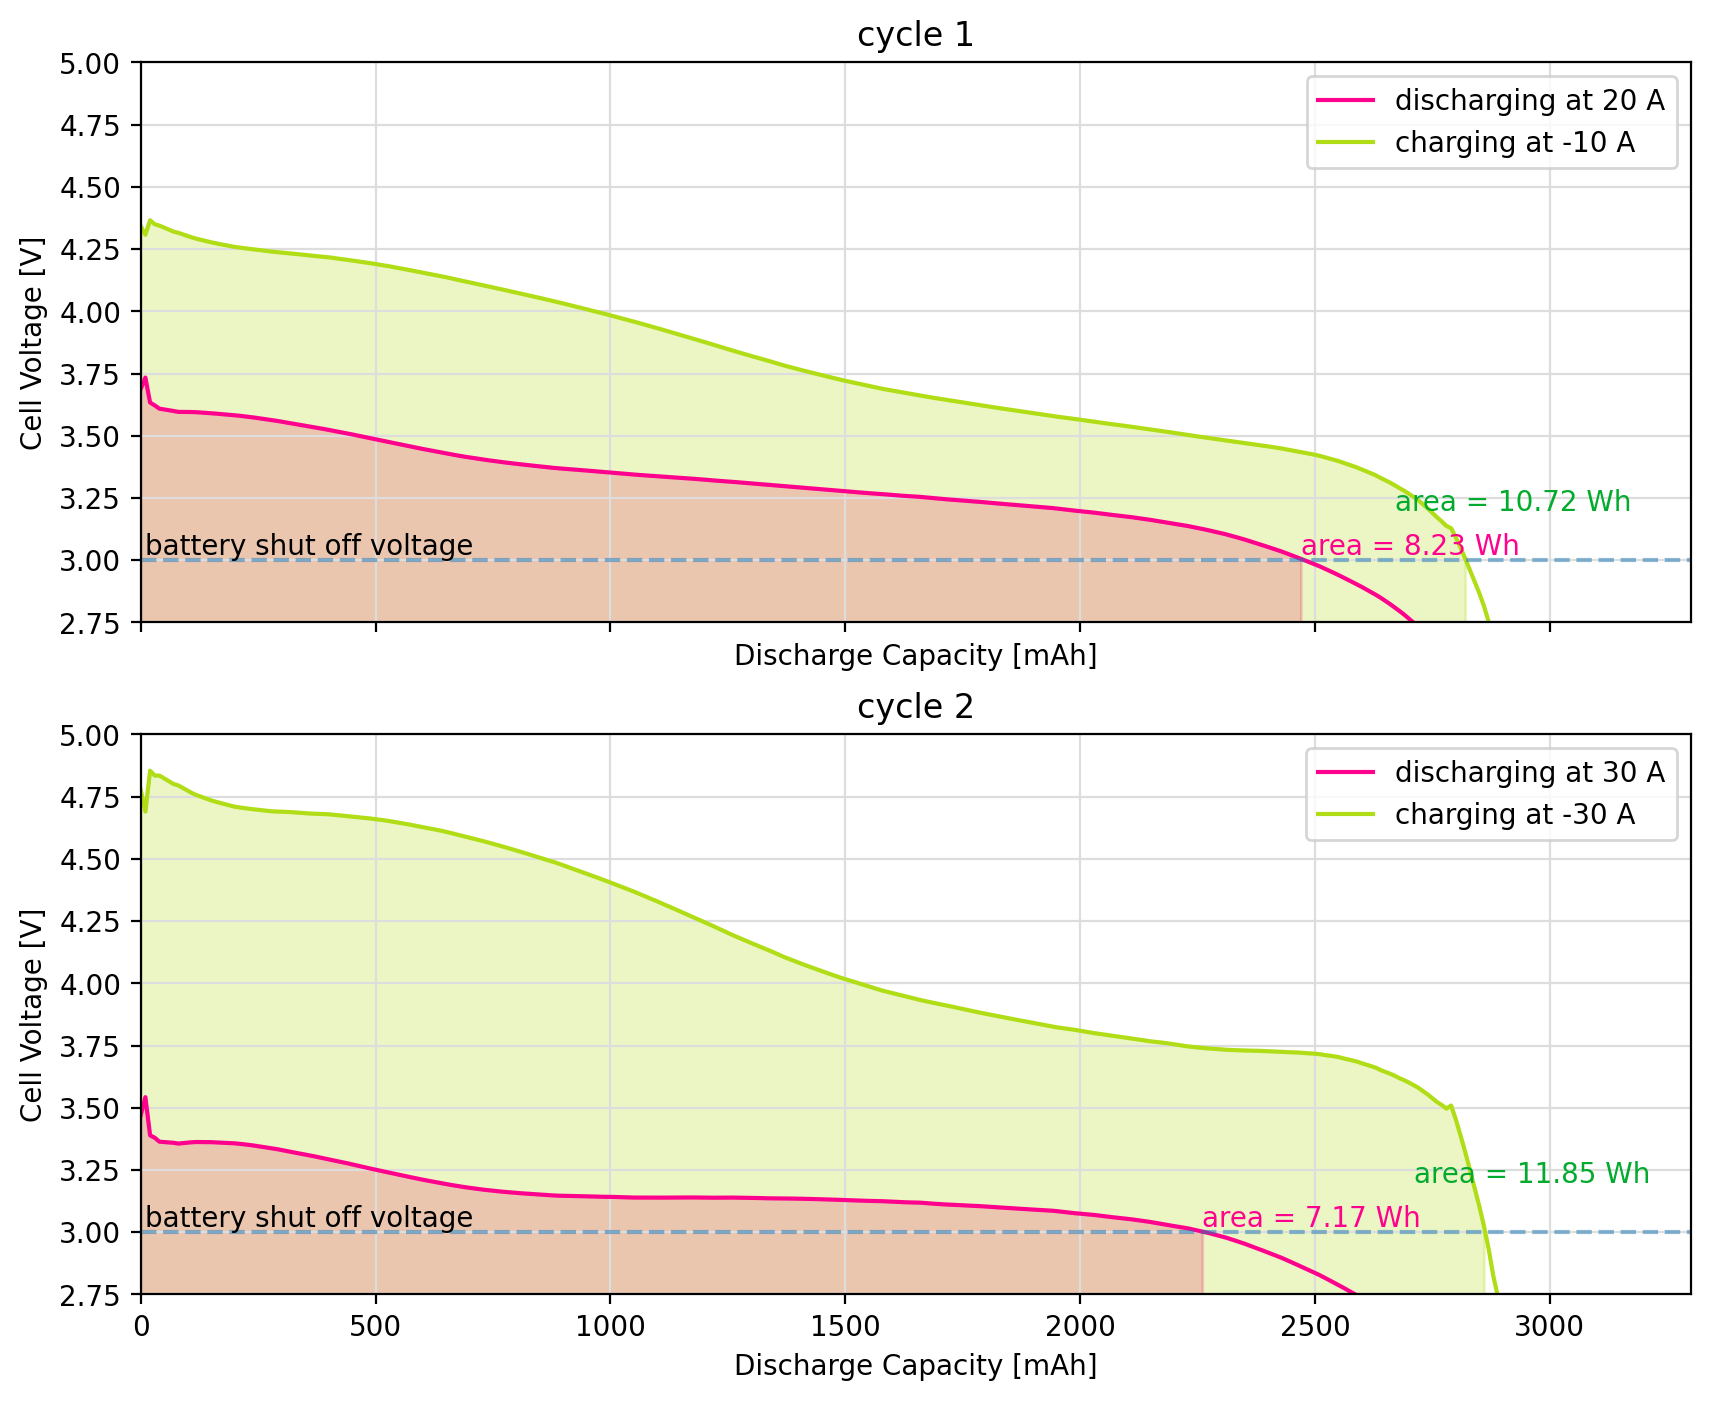

In [292]:
fig, axs = plt.subplots(2, figsize=(10, 8), sharex=True)

battery_cycles = [(20, -10), (30, -30)]

color_discharge = "xkcd:hot pink"
color_charge = "xkcd:yellowish green"
for idx, (discharge_current, charge_current) in enumerate(battery_cycles):
    ax = axs[idx]
    ax.set_ylim(2.75, 5)
    ax.set_xlim(0, 3300)

    discharge_curve = v_oc - discharge_current * rint
    ax.plot(
        x_dis_cap,
        discharge_curve,
        color=color_discharge,
        label=f"discharging at {discharge_current} A",
    )

    first_index_where_voltage_below_threshold = next(
        (index for index, value in enumerate(discharge_curve) if value < threshold),
        None,
    )
    ax.fill_between(
        x_dis_cap[:first_index_where_voltage_below_threshold],
        0,
        discharge_curve[:first_index_where_voltage_below_threshold],
        color=color_discharge,
        alpha=0.25,
    )

    integral = np.trapz(
        discharge_curve[:first_index_where_voltage_below_threshold],
        x_dis_cap[:first_index_where_voltage_below_threshold] / 1000,
    )
    x_max = max(x_dis_cap[:first_index_where_voltage_below_threshold])
    ax.text(x_max, 3.02, f"area = {round(integral, 2)} Wh", color=color_discharge)

    charge_curve = v_oc - charge_current * rint
    ax.plot(
        x_dis_cap,
        charge_curve,
        color=color_charge,
        label=f"charging at {charge_current} A",
    )
    first_index_where_voltage_below_threshold = next(
        (index for index, value in enumerate(charge_curve) if value < threshold), None
    )
    ax.fill_between(
        x_dis_cap[:first_index_where_voltage_below_threshold],
        0,
        charge_curve[:first_index_where_voltage_below_threshold],
        color=color_charge,
        alpha=0.25,
    )

    integral = np.trapz(
        charge_curve[:first_index_where_voltage_below_threshold],
        x_dis_cap[:first_index_where_voltage_below_threshold] / 1000,
    )
    x_max = max(x_dis_cap[:first_index_where_voltage_below_threshold])
    ax.text(
        x_max - 150, 3.2, f"area = {round(integral, 2)} Wh", color="xkcd:kelly green"
    )

    ax.hlines([3], 0, 4000, linestyles="dashed", alpha=0.5)
    ax.text(10, 3.02, "battery shut off voltage")
    nice_grid(ax)
    ax.minorticks_off()
    ax.set_xlabel("Discharge Capacity [mAh]")
    ax.set_ylabel("Cell Voltage [V]")
    ax.legend()
    ax.set_title(f"cycle {idx + 1}")

So, we now have the cycle efficiencies.

$$
\eta_{cycle 1} = \dfrac{8.23Wh}{10.72Wh} = \colorbox{yellow}{76.8\%}
$$

$$
\eta_{cycle 2} = \dfrac{7.17Wh}{11.85Wh} = \colorbox{yellow}{60.5\%}
$$

These numbers seem a little low. Perhaps my calculation of R<sub>int</sub> was a bit off.

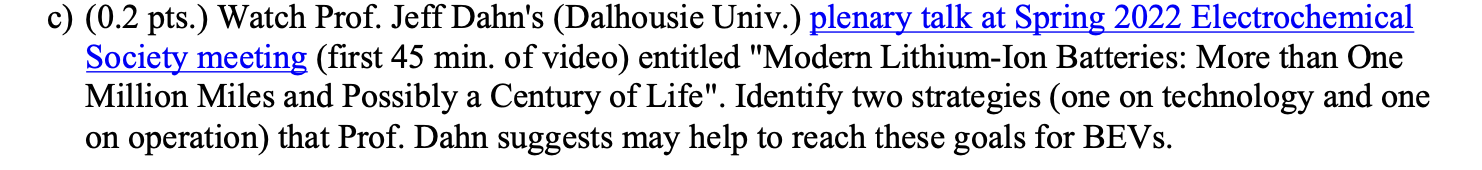

1. Technology improvement: Using LiFSI as the main salt in the battery electrolyte instead of, say, LiPF6. His research has shown that these cells have reduced impedance growth over thousands of cycles. This is attributed to the superior chemical and thermal stability of LiFSI, which minimizes the degradation of the electrolyte and the formation of resistive layers on the electrode surfaces.

2. Operation: Capping the battery operating voltage to 3.8 V instead of the typical 4.2 V used in many lithium-ion cells. This extends the life of the battery cells by slowing down the degradation processes such as electrode dissolution and the breakdown of the electrolyte.

# 3. LDV Power Plant Comparison

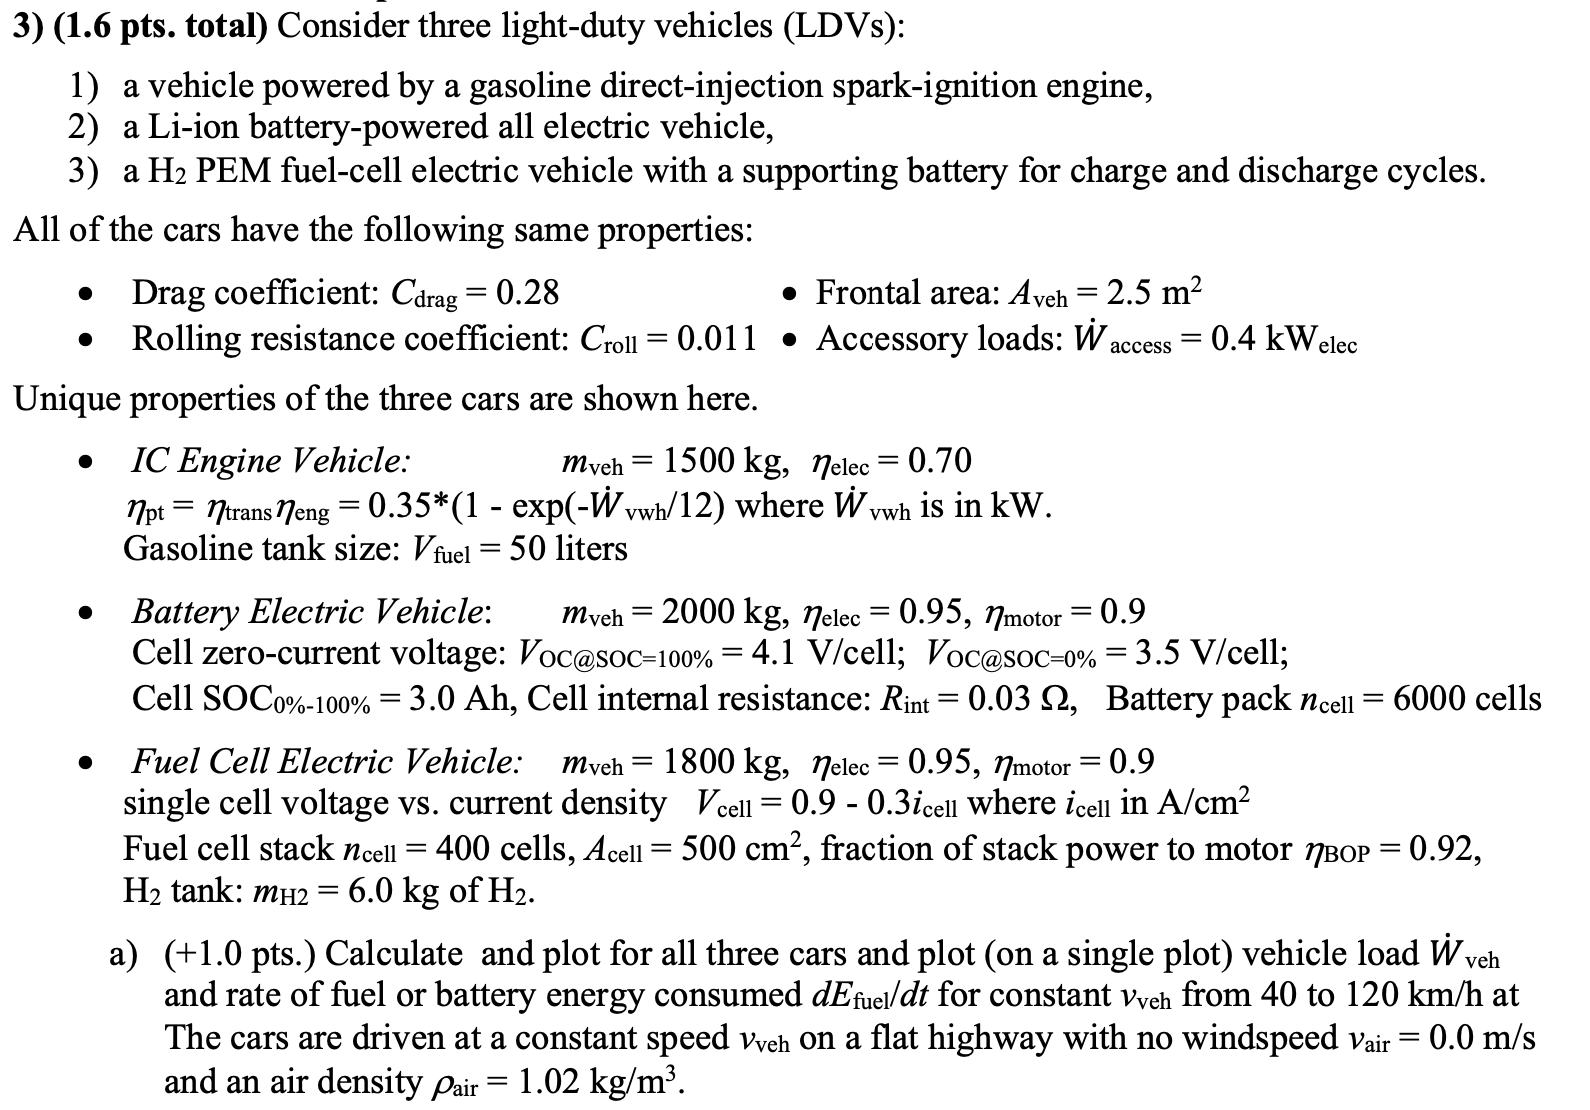

In [179]:
import copy

# constants
G = 9.81  # m/s^2
energydensity_fuel = 34.2  # gasoline energy density (in MJ/l)

# ambient air conditions
ambient = dict(
    v_air=0,  # ambient wind velocity where negative is headwind  (in m/s)
    rho=1.02,  # hardcoding in air density kg/m^3
)

mps_per_kph = 0.2777777  # 1kph = 0.27777777 mps
eta_motor = 0.9
eta_bop = 0.92  # "Balance Of Plant" efficiency

# constant velocities from 40 to 120 km/h
speeds = np.arange(40, 120.5, 0.5)

common_properties = dict(
    C_drag=0.28,  # drag coefficient [-]
    A_front=2.5,  # frontal area for drag [m^2]
    C_roll_0=0.011,  # tire rolling resistance coefficient [-]
    Wdot_access=400,  # average accessory loads [W]
    # To be filled in later
    Wdot_drag=[0] * len(speeds),
    Wdot_roll=[0] * len(speeds),
    Wdot_accel=[0] * len(speeds),
    Wdot_access_vec=[0] * len(speeds),
    Wdot=[0] * len(speeds),
    x=[0] * len(speeds),
    E_veh=[0] * len(speeds),
    E_fuel=[0] * len(speeds),
    kmperliter=[0] * len(speeds),
    mpg=[0] * len(speeds),
)


# instantaneous powertrain efficiency with wdot_veh in kW
def eta_si_powertrain(wdot_veh):
    return 0.35 * (1 - np.exp(-wdot_veh / 12))


def eta_lion_powertrain(wdot_veh):
    return eta_motor


def eta_h2_powertrain(wdot_veh):
    return eta_motor * eta_bop


# vehicle power by  a gasoline direct-injection spark-ignition engine
vehicle_ice = dict(
    **copy.deepcopy(common_properties),
    mass=1500,  # vehicle mass [kg]
    eta_elec=0.70,  # efficiency of alternator or electrical system for accessories [-]
    eta_pt=eta_si_powertrain,
    tank_size=50,  # liters
)

vehicle_bev = dict(
    **copy.deepcopy(common_properties),
    mass=2000,
    eta_elec=0.95,
    eta_pt=eta_lion_powertrain,
)
vehicle_fcev = dict(
    **copy.deepcopy(common_properties),
    mass=1800,
    eta_elec=0.95,
    eta_pt=eta_h2_powertrain,
)

In [197]:
from scipy.integrate import solve_ivp

cycle = dict(time=np.arange(0, 60), mps=speeds * mps_per_kph)


# Function to solve system of 1st-order linear ODEs with oscillatory forcing
def dydt_vehicle(
    t, y, cycle, vehicle, amb, index
):  # Determine instantaneous values of velocity, acceleration, and road angle.
    dydt = [0] * len(y)

    v_veh = np.interp(t, cycle["time"], cycle["v_veh"])
    dv_vehdt = np.interp(t, cycle["time"], cycle["dv_vehdt"])
    alpha = np.pi / 180 * np.interp(t, cycle["time"], cycle["alpha"])

    # Set instantaneous velocity
    dydt[index["x"]] = v_veh

    C_roll = vehicle["C_roll_0"]

    term = (
        vehicle["mass"] * (dv_vehdt + G * np.sin(alpha) + C_roll * G * np.cos(alpha))
        + vehicle["C_drag"]
        * vehicle["A_front"]
        * 0.5
        * amb["rho"]
        * (v_veh - amb["v_air"]) ** 2
    )
    Wdot_veh = (max(0, term)) * v_veh + vehicle["Wdot_access"] / vehicle["eta_elec"]

    dydt[index["E_veh"]] = Wdot_veh

    # Determine power train efficiency and instantaneous fuel energy demand rate
    eta = vehicle["eta_pt"](Wdot_veh / 1000)
    dydt[index["E_fuel"]] = Wdot_veh / eta
    return dydt


# Set up indices and intial conditions for solution vector y(t) = [x; Wdot_veh]'
index = dict(x=0, E_veh=1, E_fuel=2)
y_0 = [None] * 3
y_0[index["x"]] = 0
y_0[index["E_veh"]] = 0
y_0[index["E_fuel"]] = 0


def calculate_loads(vehicle):
    for idx, speed in enumerate(cycle["mps"]):
        time = cycle["time"]
        arr_length = len(time)

        #  driving cycle vehicle velocities [m/s]
        cycle["v_veh"] = [speed] * arr_length
        # road angle to horizontal  [deg.]
        cycle["alpha"] = [0] * arr_length
        # Calculate vehicle acceleration and identify times when acceleration is positive, zero for this problem
        cycle["dv_vehdt"] = np.gradient(cycle["v_veh"])

        # Call an ODE integrator to solve for y(t)
        sol = solve_ivp(
            dydt_vehicle,
            [0, time[-1] + 1],
            y_0,
            "RK45",
            time,
            args=(cycle, vehicle, ambient, index),
            rtol=1e-4,
            atol=1e-4,
        )

        vehicle["x"][idx] = sol.y[index["x"]] / 1000
        vehicle["E_veh"][idx] = sol.y[index["E_veh"]] / 1000
        vehicle["E_fuel"][idx] = sol.y[index["E_fuel"]] / 1000
        vehicle["kmperliter"][idx] = [0] * arr_length
        vehicle["kmperliter"][idx] = (
            1000 * vehicle["x"][idx] / (vehicle["E_fuel"][idx] / energydensity_fuel)
        )
        vehicle["mpg"][idx] = 2.35215 * vehicle["kmperliter"][idx]

        #  Allocate memory for vectors for calculating vehicle power requirements
        vehicle["Wdot_drag"][idx] = np.zeros(arr_length)
        vehicle["Wdot_roll"][idx] = np.zeros(arr_length)
        vehicle["Wdot_accel"][idx] = np.zeros(arr_length)

        # Calculate instantaneous power (in kW) to overcome forces on vehicle
        #   and integrate to get total work required (in kWh)
        vehicle["Wdot_drag"][idx] = (
            (
                np.array(
                    vehicle["C_drag"]
                    * vehicle["A_front"]
                    * 0.5
                    * ambient["rho"]
                    * (np.array(cycle["v_veh"]) - ambient["v_air"]) ** 2
                )
            )
            * cycle["v_veh"]
            / 1000
        )

        C_roll = vehicle["C_roll_0"]
        vehicle["Wdot_roll"][idx] = (
            vehicle["mass"]
            * C_roll
            * (G * np.cos(cycle["alpha"]) * cycle["v_veh"] / 1000)
        )
        vehicle["Wdot_accel"][idx] = (
            np.array([max(0, dv_dt) for dv_dt in cycle["dv_vehdt"]])
            * cycle["v_veh"]
            / 1000
        )
        vehicle["Wdot_access_vec"][idx] = (
            np.ones(arr_length) * vehicle["Wdot_access"] / vehicle["eta_elec"] / 1000
        )
        vehicle["Wdot"][idx] = (
            vehicle["Wdot_drag"][idx]
            + vehicle["Wdot_roll"][idx]
            + vehicle["Wdot_accel"][idx]
            + vehicle["Wdot_access_vec"][idx]
        )

    return vehicle

205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
205.93904939259608
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719762857
207.04778719

/var/folders/ht/kgx7l0rn2p5g_jl_0gn7njvm0000gn/T/ipykernel_22647/3144924175.py:78: RuntimeWarning: invalid value encountered in divide
  1000 * vehicle["x"][idx] / (vehicle["E_fuel"][idx] / energydensity_fuel)


368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
368.70874540078523
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.7678298958456
370.767829895845

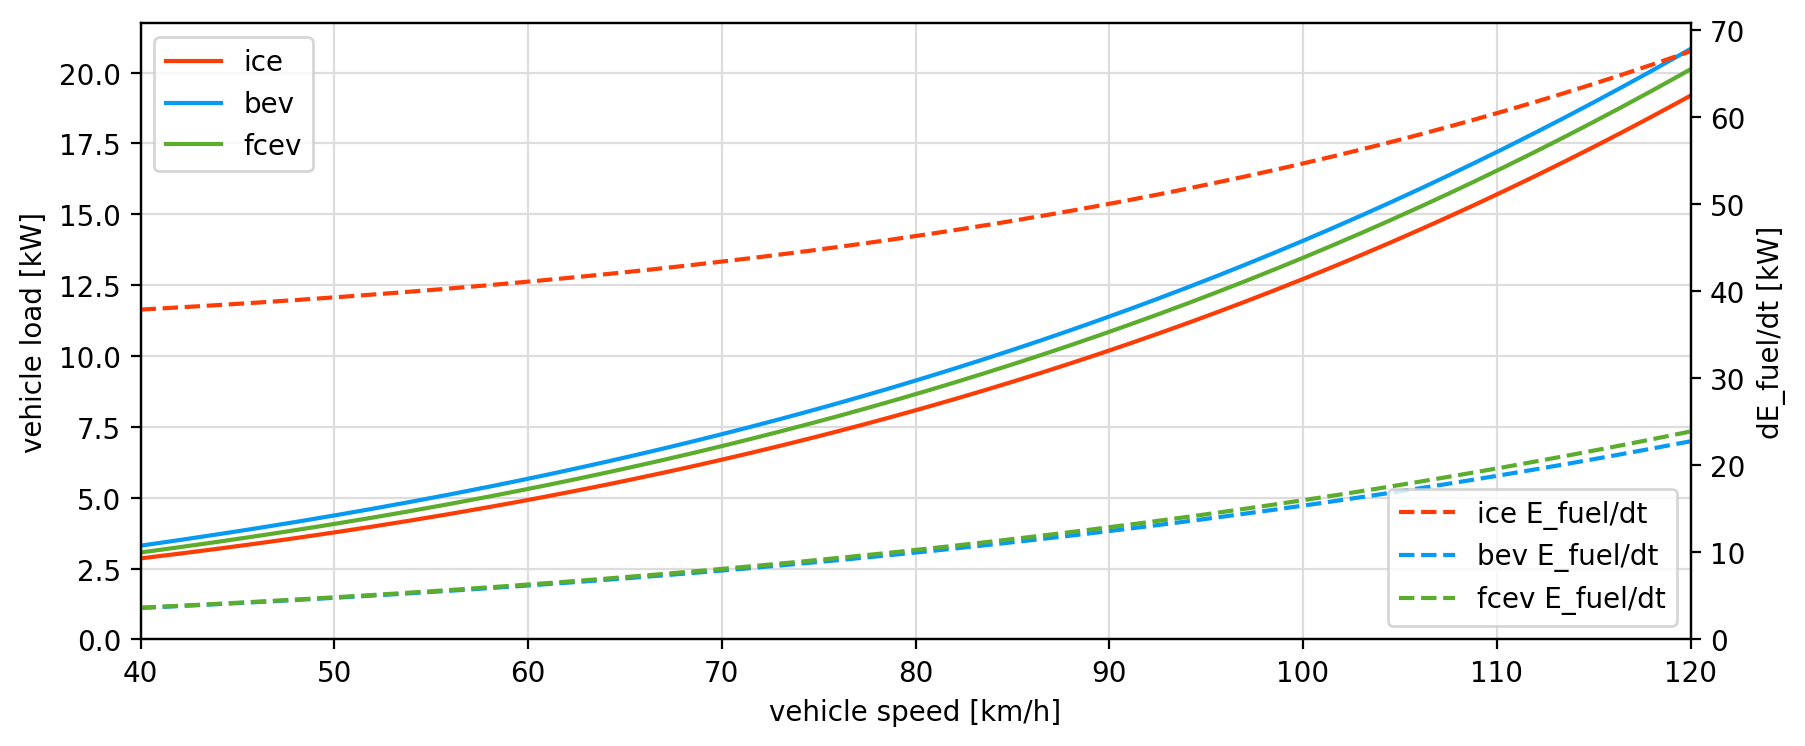

In [193]:
vehicle_ice = calculate_loads(vehicle_ice)
vehicle_bev = calculate_loads(vehicle_bev)
vehicle_fcev = calculate_loads(vehicle_fcev)

ice_color = "xkcd:red orange"
bev_color = "xkcd:azure"
fcev_color = "xkcd:grass"

fig, ax = plt.subplots(figsize=(10, 4))
ax2 = ax.twinx()


ax.plot(speeds, [max(arr) for arr in vehicle_ice["Wdot"]], label="ice", color=ice_color)
ax.plot(speeds, [max(arr) for arr in vehicle_bev["Wdot"]], label="bev", color=bev_color)
ax.plot(
    speeds, [max(arr) for arr in vehicle_fcev["Wdot"]], label="fcev", color=fcev_color
)
# dividing by 60 because 60 seconds in simulation
ax2.plot(
    speeds,
    # all E_fuel's are the same per simulation, so just taking a single value
    [max(arr) / 60 for arr in vehicle_ice["E_fuel"]],
    label="ice E_fuel/dt",
    linestyle="dashed",
    color=ice_color,
)
ax2.plot(
    speeds,
    [max(arr) / 60 for arr in vehicle_bev["E_fuel"]],
    label="bev E_fuel/dt",
    linestyle="dashed",
    color=bev_color,
)
ax2.plot(
    speeds,
    [max(arr) / 60 for arr in vehicle_fcev["E_fuel"]],
    label="fcev E_fuel/dt",
    linestyle="dashed",
    color=fcev_color,
)
ax.set_ylabel("vehicle load [kW]")
ax2.set_ylabel("dE_fuel/dt [kW]")
ax.set_xlabel("vehicle speed [km/h]")
ax.set_ylim(0)
ax2.set_ylim(0)
ax.set_xlim(40, 120)
ax.legend(loc="upper left")
ax2.legend(loc="lower right")

nice_grid(ax)
ax.minorticks_off();

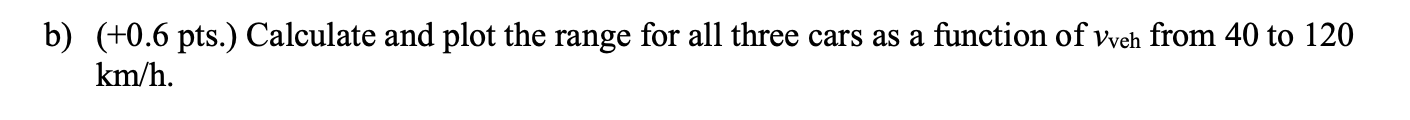

The ICE vehicle is a relatively straightforward calculation.

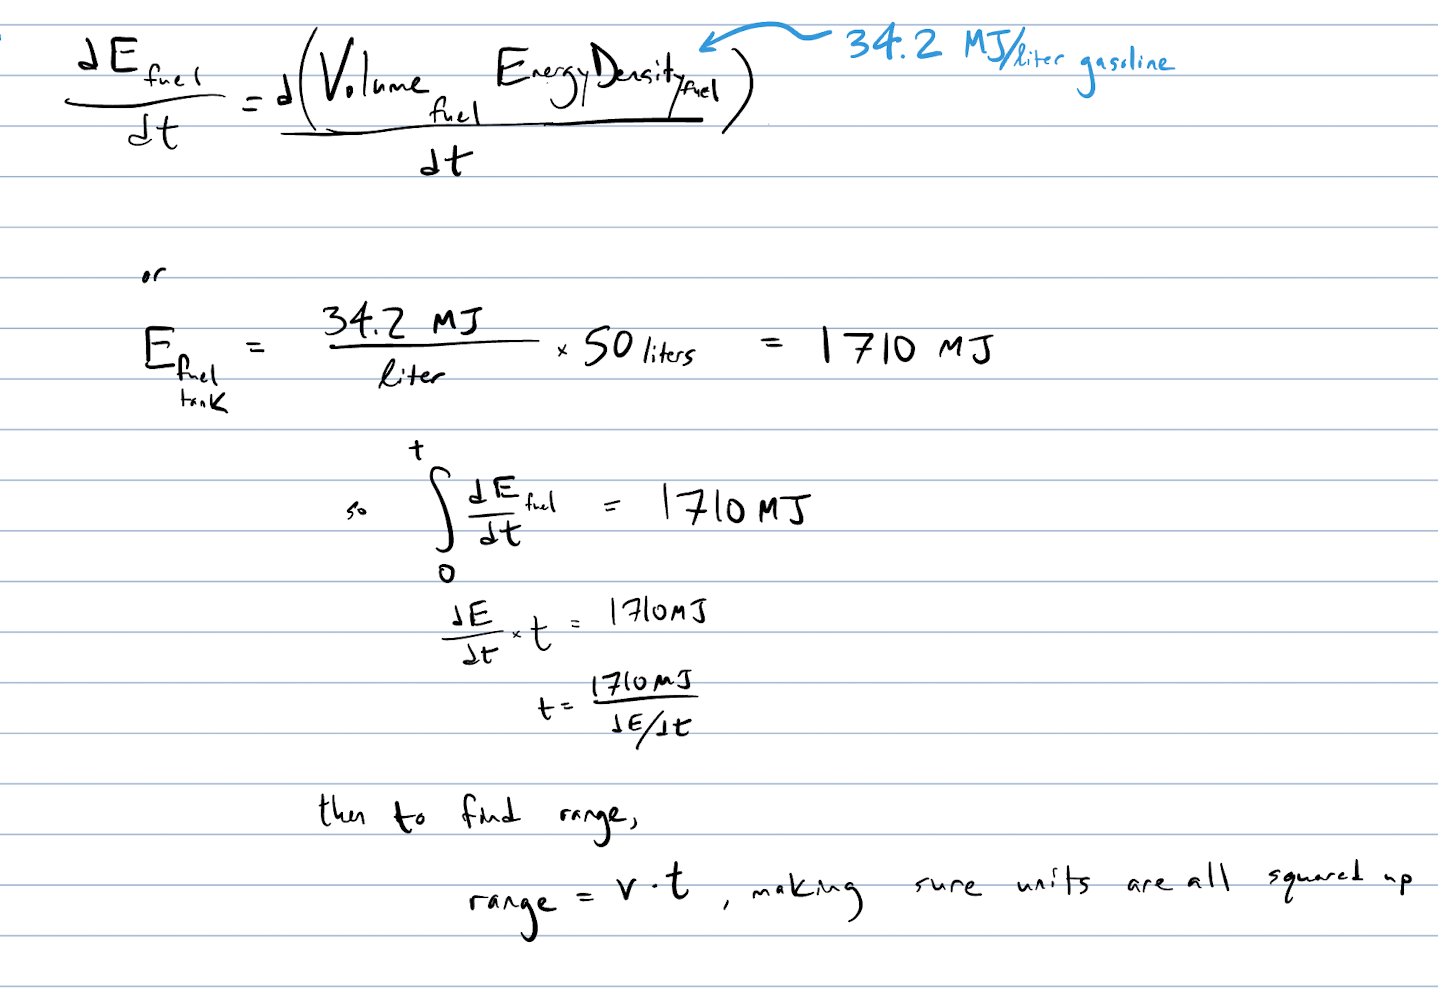

In [194]:
dE_dt_fuel = np.array(
    [max(arr) * 1e3 / 60 for arr in vehicle_ice["E_fuel"]]
)  # can't forget to go kW to W)
time_to_empty_in_seconds = 1710e6 / dE_dt_fuel
time_to_empty_in_hours = time_to_empty_in_seconds / 3600
ice_range = speeds * time_to_empty_in_hours  # in km



For the EV, we'll assume the open circuit voltage of the battery cell decreases linearly with state of charge:


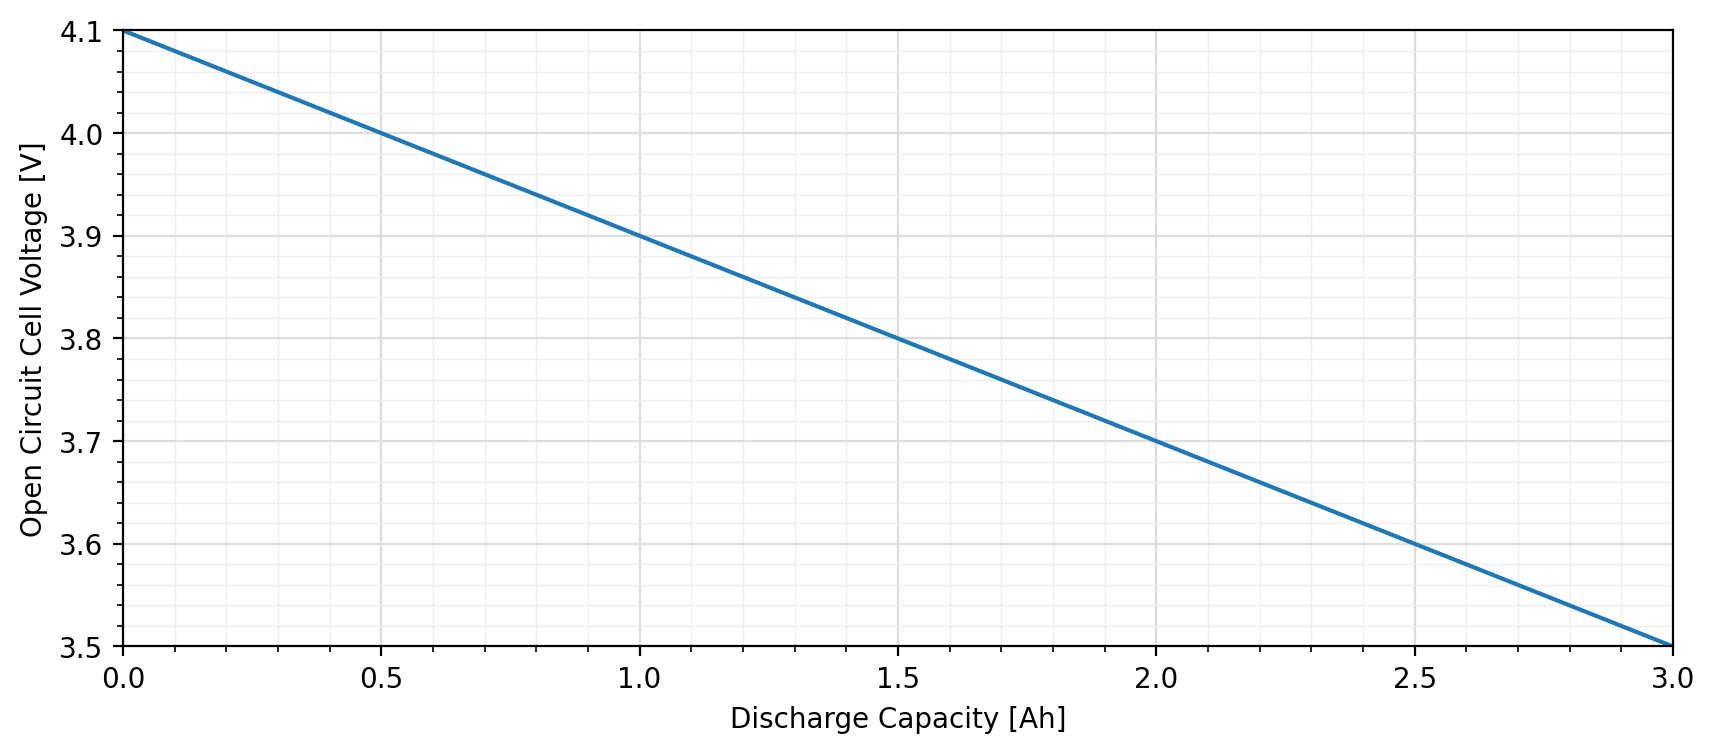

In [195]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(0, 3.1, 0.1)


# discharge capacity in amp hours
def calc_v_oc(discharge_capacity):
    return 4.1 - discharge_capacity * (4.1 - 3.5) / 3


ax.plot(x, calc_v_oc(x))
ax.set_ylim(3.5, 4.1)
ax.set_xlim(0, 3)
ax.set_xlabel("Discharge Capacity [Ah]")
ax.set_ylabel("Open Circuit Cell Voltage [V]")
nice_grid(ax)

Since this plot is linear, we can just use the average open circuit cell voltage of 3.8V.

At a given speed, we have the power of the vehicle. We can then figure out the current, by solving for it in the below equation.

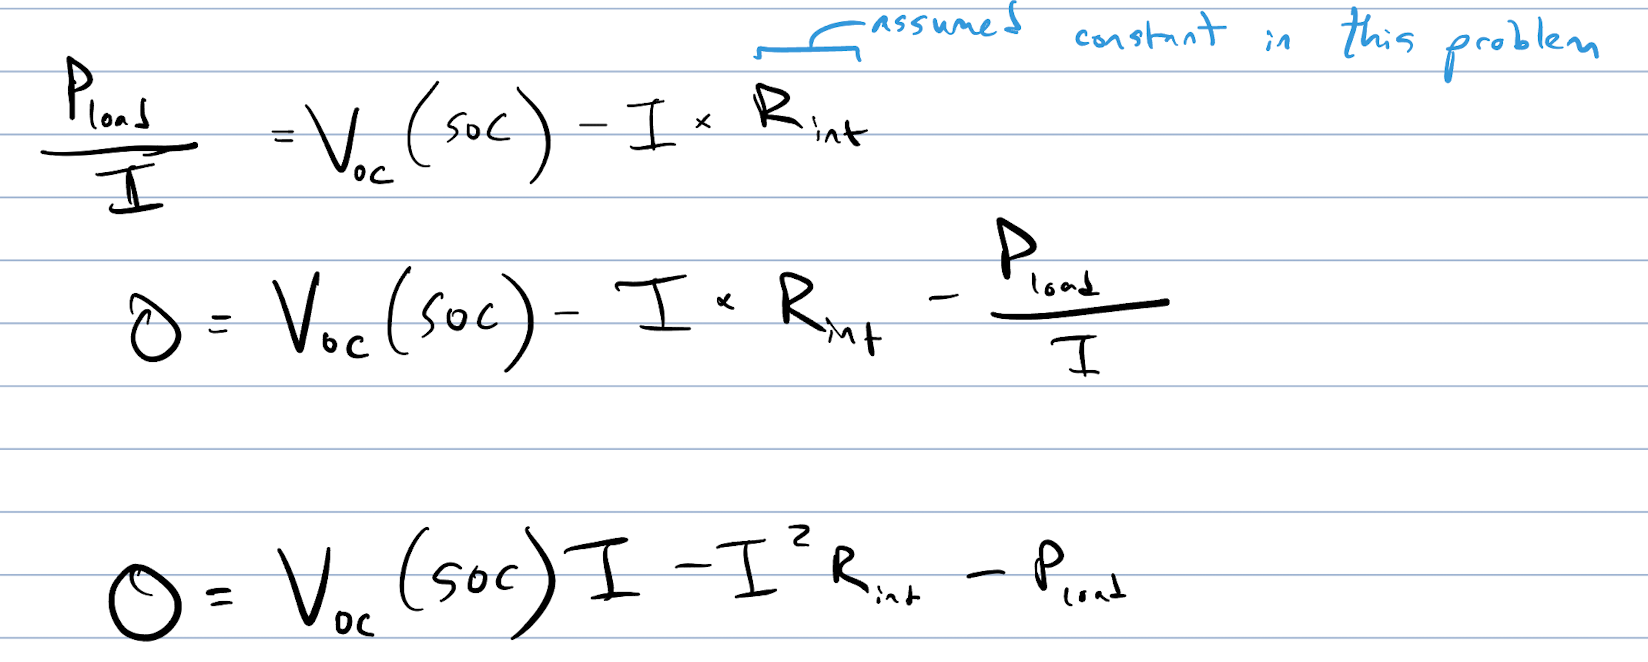

Then, from the current, we can figure out the total energy capacity.

$$
Energy\hspace{0.1cm}Capacity = 3 Ah \times 6000 cells \times V_{cell}{\hspace{1cm}}where{\hspace{0.1cm}}V_{cell} = V_{oc} - I \times R_{int} = 3.8 - I \times 0.03
$$

Putting those equations together, we get

$$
Energy\hspace{0.1cm}Capacity = 3 Ah \times 6000 cells \times (3.8 - I \times 0.03)
$$

Now we can get range by 

$$
range [km] = \dfrac{speed [km/h]}{power [W]} \times {Energy\hspace{0.1cm}Capacity [Wh]}
$$


Text(0.5, 1.0, 'Vehicle Range vs Speed')

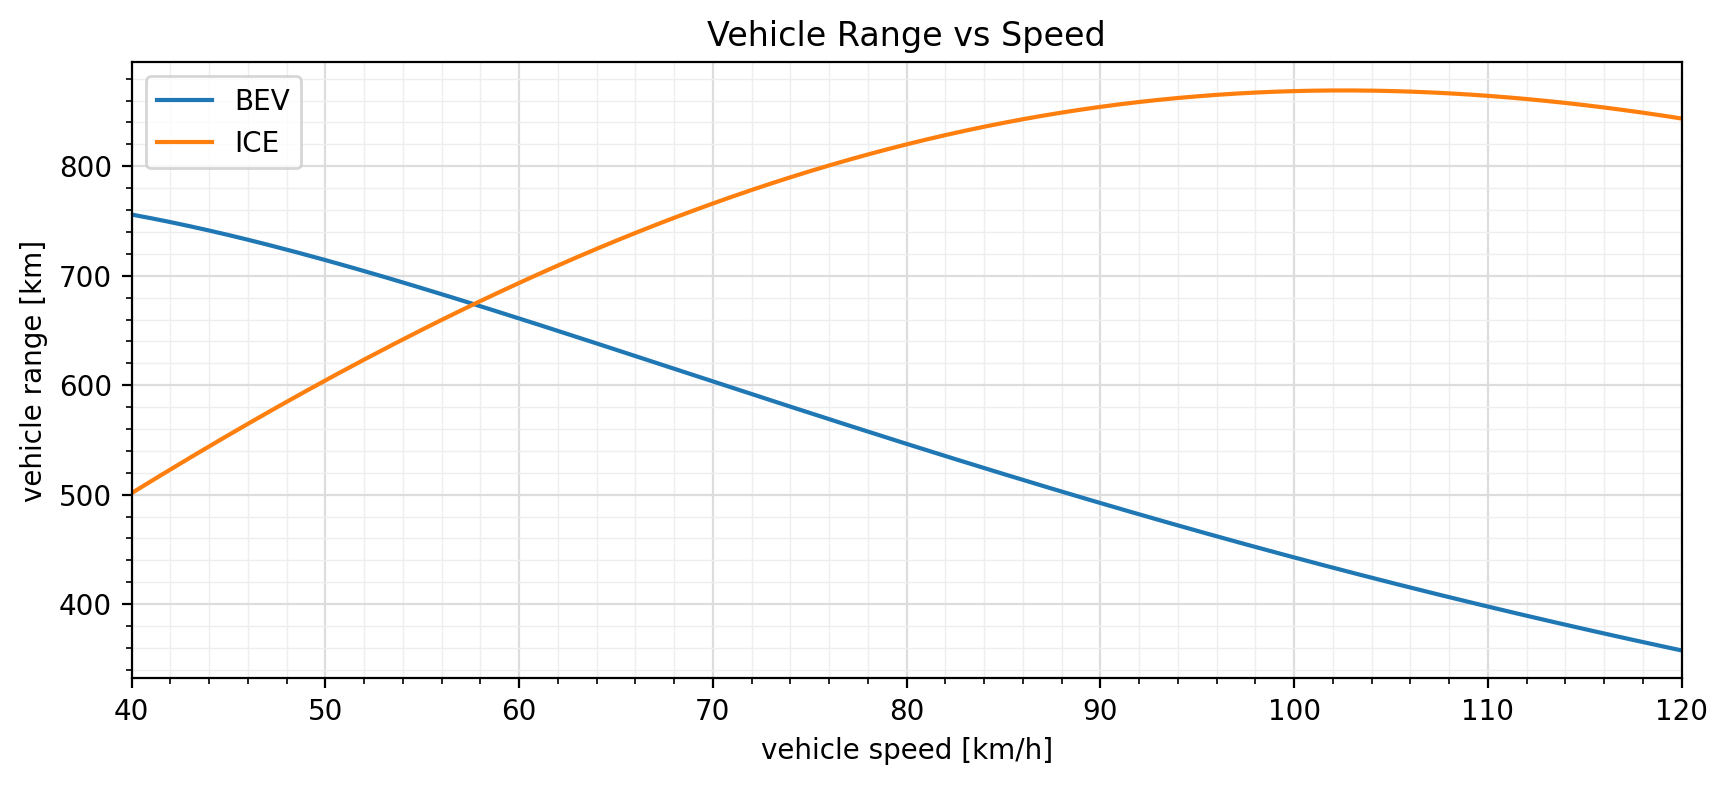

In [240]:
fig, ax = plt.subplots(figsize=(10, 4))

power_bev = np.array([max(arr) / 60 for arr in vehicle_bev["E_fuel"]])
R_int = 0.03

bev_ranges = []
# p in kw
for idx, p in enumerate(power_bev):
    roots = np.roots([-R_int, 3.8, -p * 1000 / 6000])
    current = np.min(np.roots([-R_int, 3.8, -p * 1000 / 6000]))
    # 3 amp hours x 6000 cells x V_cell
    energy_capacity = 3 * 6000 * (3.8 - current * R_int)
    rng = (speeds[idx] / (p * 1000)) * energy_capacity
    bev_ranges = [*bev_ranges, rng]


ax.plot(speeds, bev_ranges, label="BEV")
ax.plot(speeds, ice_range, label="ICE")
nice_grid(ax)
ax.set_xlabel("vehicle speed [km/h]")
ax.set_ylabel("vehicle range [km]")
ax.set_xlim(40, 120)
ax.legend()
ax.set_title("Vehicle Range vs Speed")